<b>Enteros de Carmichael</b>

In [1]:
def enterosCarmichael(N):
    L = []
    for k in xsrange(1, N):
        if is_prime(k): # k tiene que ser compuesto
            continue
        flag = 0
        for a in xsrange(k):
            if(gcd(a, k)!=1): # para todo coprimo. Si no es coprimo ni lo intentamos
                continue
            aux = power_mod(a, k-1, k)
            if(aux!=1):
                flag = 1
        if(flag==0):
            L.append(k)
    return L

In [2]:
%time enterosCarmichael(3000)

CPU times: user 26.4 s, sys: 428 ms, total: 26.8 s
Wall time: 26.4 s


[561, 1105, 1729, 2465, 2821]

Tal y como podemos ver en el tiempo necesitado para la ejecución para $N = 3000$ la función no es muy eficiente. No se me ha ocurrido una mejor implementación. Necesitamos dos bucles, uno para percorrer los posibles valores de $n$ y otro para comprobar que <b>para todo</b> coprimo con n, se cumple la condición de enteros de Carmichael.

Podemos comprobar en wikipedia que la lista resultante es la lista de enteros de Carmichael entre $1$ y $3000$.

<b>Miller-Rabin</b>

In [3]:
def obtenerSD(n):
    s = 0
    aux = n-1
    while aux%2==0:
        s = s+1
        aux = aux//2
    return s, aux

In [4]:
obtenerSD(64*5+1) 

(6, 5)

In [5]:
def condicion1(a,d,n):
    if power_mod(a, d, n)==1:
        return True
    return False

In [6]:
def condicion2(a,s,d,n):
    for r in xsrange(s):
        if (power_mod(a,(2**r)*d,n)+1)%n == 0:
            return True
    return False

In [7]:
def testigo(a,n): #suponemos en este momento que a es coprimo con n
    s,d = obtenerSD(n)
    if condicion1(a,d,n)==False and condicion2(a,s,d,n)==False:
        return True # TESTIGO ==> n COMPUESTO
    else:
        return False # NO ES TESTIGO ==> n PUEDE ser primo

In [8]:
def miller_rabin1(n,t): # p = probabilidad de que sea compuesto
    for i in xsrange(1,t+1):
        a = randint(1, n-1)
        if(gcd(a,n)!=1): #deben ser coprimos
            continue
        if testigo(a,n):
            return True #COMPUESTO
    return False # probable primo

In [9]:
miller_rabin1(nth_prime(100), 10) #False==probablemente primo

False

In [10]:
miller_rabin1(nth_prime(1456888), 10) #False==probablemente primo

False

In [11]:
miller_rabin1(345*654, 4) 

True

In [12]:
producto_primos_grande = nth_prime(123456789)*nth_prime(98765432)
%time miller_rabin1(producto_primos_grande, 20)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 287 µs


True

El algoritmo comprueba correctamente que el producto de dos primos muy grandes es realmente un número compuesto. Quizá haya algunos casos en los que prediga que es probabilisticamente primo, pero es una probabilidad bastante baja.

<b>Pollard $p-1$</b>

In [2]:
def calcularM(B,n):
    primos_menores_B = prime_range(B+1)
    M = 1;
    for item in primos_menores_B:
        M = M * (item**((log(B, base=item).n()).ceil()))
    return M

In [3]:
def pollard(B, n): #suponemos a ya coprimo con n
    M = calcularM(B,n)
    
    for i in xsrange(100):
        a = randint(2, 1000)
        if gcd(a,n)==1:
            aux = power_mod(a,M,n)-1
            res = gcd(aux,n)
            if res>1 and res<n:
                return res
    return -1

In [4]:
def calcular_pollard(Binicial, n, maxIter):
    nIter = 0
    B = Binicial
    while nIter < maxIter:
        aux = pollard(B,n)
        if aux!=-1:
            return aux
        nIter = nIter + 1
        B += 100
    return -1

In [5]:
prod_primos = nth_prime(1974)*nth_prime(13826755) #cogemos un ejemplo de las ojas de ejercicios
calcular_pollard(10, prod_primos, 1000)

17123

Cogiendo un ejemplo de la hoja de ejercicios, podemos ver que el resultado coincide

In [13]:
def prueba_sencilla():
    for k in xsrange(1,6):
        product1 = nth_prime(999*10*k)
        product2 = nth_prime(555*5**k)
        product = product1*product2
        print "Primo 1 = "+str(product1)
        print "Primo 2 = "+str(product2)
        print "Resultado de aplicar pollard = "+str(calcular_pollard(5*k, product, 10000))

In [14]:
%time prueba_sencilla()

Primo 1 = 104659
Primo 2 = 25147
Resultado de aplicar pollard = 25147
Primo 1 = 224491
Primo 2 = 150299
Resultado de aplicar pollard = 224491
Primo 1 = 349927
Primo 2 = 874009
Resultado de aplicar pollard = 874009
Primo 1 = 479371
Primo 2 = 4975111
Resultado de aplicar pollard = 479371
Primo 1 = 611213
Primo 2 = 27879287
Resultado de aplicar pollard = 611213
CPU times: user 992 ms, sys: 92 ms, total: 1.08 s
Wall time: 963 ms


Vemos que los resultados son satisfactorios, y en un tiempo bastante bueno. No obstante, no hemos utilizamos primos demasiado grandes, en ese caso el algoritmo podría funcionar muy ineficientemente. Recordemos que factorizar no es un algoritmo sencillo.

<b>El juego de la vida</b>

Vamos a hacer la implementación del juego de la vida con las reglas descritas en los apuntes de clase.

In [37]:
def lista_vecinos(tam, p): #esperamos el tamaño tam*tam y un punto (x,y) de la matriz
    L = []
    L.append(((p[0]+1)%tam,(p[1]+1)%tam))
    L.append(((p[0])%tam,(p[1]+1)%tam))
    L.append(((p[0]-1)%tam,(p[1]+1)%tam))
    L.append(((p[0]-1)%tam,(p[1])%tam))
    L.append(((p[0]-1)%tam,(p[1]-1)%tam))
    L.append(((p[0])%tam,(p[1]-1)%tam))
    L.append(((p[0]+1)%tam,(p[1]-1)%tam))
    L.append(((p[0]+1)%tam,(p[1])%tam))
    return L

In [38]:
def copiar_matriz(M, tam):
    copia = []
    for i in xsrange(tam):
        copia.append(copy(M[i]))
    return copia

In [74]:
def vecinos_vivos(M, x, y, tam):
    cont = 0
    vecinos = lista_vecinos(tam, (x,y))
    for j in xsrange(len(vecinos)):
        cont = cont + M[vecinos[j][0]][vecinos[j][1]]
    return cont

In [75]:
TEST = [[1,0,0], [0,0,0], [0,0,0]]
TEST[0][0] = 1
print TEST
for i in xsrange(3):
    for k in xsrange(3):
        print vecinos_vivos(TEST, i, k, 3)

[[1, 0, 0], [0, 0, 0], [0, 0, 0]]
0
1
1
1
1
1
1
1
1


In [76]:
def evolucion_puntual(M, copia, x, y, tam):
    n_vivos = vecinos_vivos(M, x, y, tam)
    if M[x][y]==1 and n_vivos < 2:
        copia[x][y] = 0
    elif M[x][y]==1 and n_vivos > 3:
        copia[x][y] = 0
    elif M[x][y]==0 and n_vivos==3:
        copia[x][y] = 1
    return copia

In [77]:
def evolucion_poblacion(M, tam): # M es una lista de listas, solo en el ultimo momento la transformaremos en matriz
    C = copiar_matriz(M, tam)
    for x in xsrange(tam):
        for y in xsrange(tam):
            C = evolucion_puntual(M, C, x, y, tam)
    return C

In [78]:
def fases_de_evolucion(M, tam, nEvol):
    for k in xsrange(nEvol):
        M = evolucion_poblacion(M, tam)
    return M

In [82]:
M = [[1, 1, 0, 1, 0], [0, 0, 0, 1, 0], [1, 0, 1, 0, 1], [0, 1, 1, 0, 1], [0, 1, 0, 0, 1]]
print "Matriz antes de ser evolucionada por el juego de la vida:"
print matrix(M)
M1 = fases_de_evolucion(M, 5, 6)
print "Matriz despues de la evolucion:"
print matrix(M1)


Matriz antes de ser evolucionada por el juego de la vida:
[1 1 0 1 0]
[0 0 0 1 0]
[1 0 1 0 1]
[0 1 1 0 1]
[0 1 0 0 1]
Matriz despues de la evolucion:
[0 1 0 1 0]
[0 0 1 0 1]
[0 1 1 0 0]
[0 1 0 0 0]
[1 0 0 1 1]


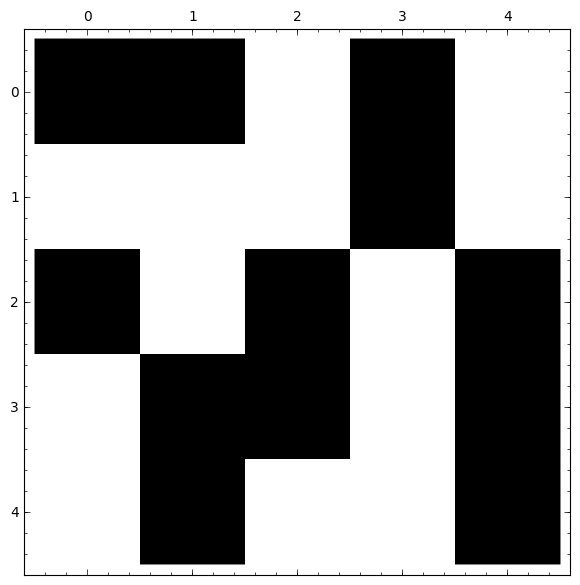

In [83]:
matrix_plot(M)

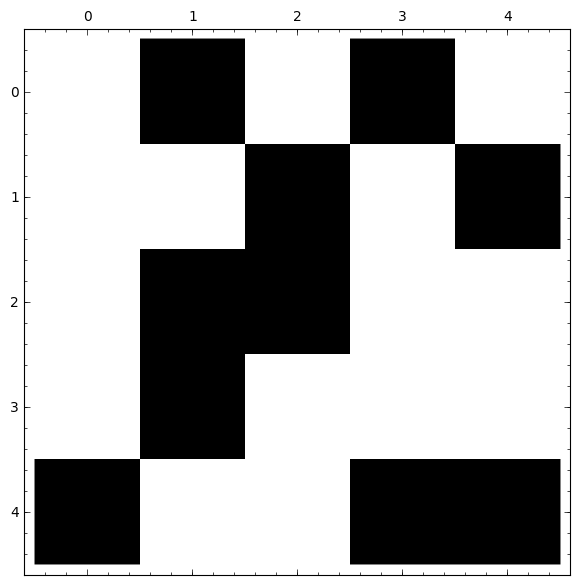

In [84]:
matrix_plot(M1)

In [88]:
matriz = [[0]*100]
for j in xsrange(99):
    matriz.append(copy(matriz[0]))
for j in xsrange(100):
    for k in xsrange(100):
        matriz[j][k] = randint(0,1)
        
%time matriz1 = fases_de_evolucion(matriz, 100, 30)


CPU times: user 14 s, sys: 128 ms, total: 14.2 s
Wall time: 14 s


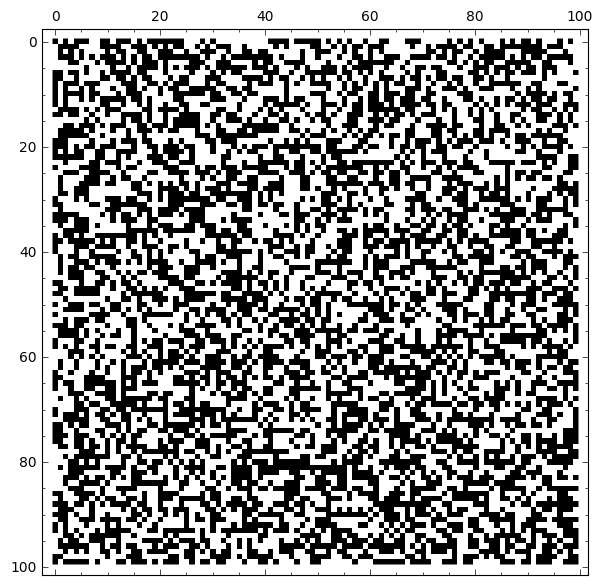

In [89]:
matrix_plot(matriz)

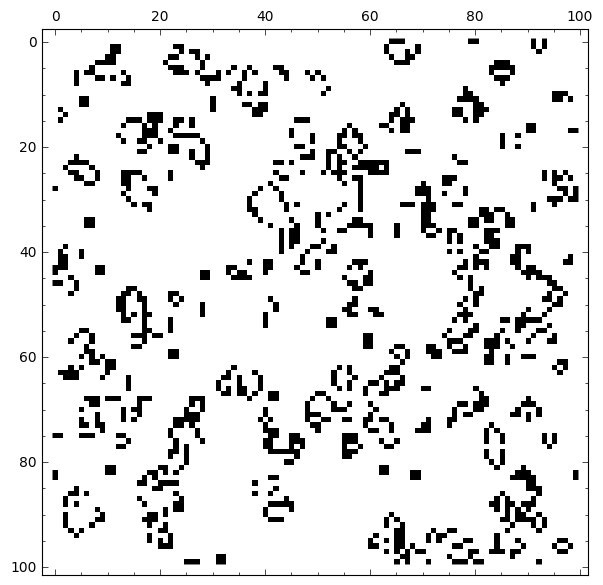

In [91]:
matrix_plot(matriz1)

Si vamos a la página del juego de la vida de Conway no es difícil ver que las evoluciones de las distintas especies se reducen a pequeñas poblaciones dispersas por la matriz hasta que se estancan en un ciclo. No podemos estar seguros de que esta sea la apariencia final de nuestra matriz de ejemplo, puesto que no hemos mejorado la implementación con python, numpy ni con la representación temporal de matrices, cosa que se podría hacer un futuro si estuviésemos muy necesitados de ello. 

<b>Automátas celulares 1-dimensionales</b>

In [4]:
def vecinos(k, L):
    a = L[k]
    ant = L[(k-1)%len(L)]
    sig = L[(k+1)%len(L)]
    t = (ant, a, sig)
    return t

In [6]:
L1aux = [1, 2, 3, 4, 5, 6]
vecinos(5, L1aux)

(5, 6, 1)

In [9]:
def listaB(k):
    return k.digits(2, padto=8)

In [10]:
listaB(255)

[1, 1, 1, 1, 1, 1, 1, 1]

In [11]:
def diccionarioD(k):
    D = {}
    T = [(0,0,0),(1,0,0),(0,1,0),(1,1,0),(0,0,1),(1,0,1),(0,1,1),(1,1,1)]
    B = listaB(k)
    for i in xsrange(8):
        D[T[i]] = B[i]
    return D

In [47]:
Daux = diccionarioD(100)
print Daux
print Daux[(0,1,0)]

{(1, 1, 0): 0, (0, 1, 1): 1, (1, 0, 0): 0, (0, 0, 1): 0, (1, 0, 1): 1, (0, 0, 0): 0, (0, 1, 0): 1, (1, 1, 1): 0}
1


In [17]:
def siguiente(L, k):
    L2 = copy(L)
    D = diccionarioD(k)
    i = randint(0, len(L)-1)
    t = vecinos(i, L)
    L2[i] = D[t]
    return L2

In [20]:
L_test_siguiente = [1,0,1,0,1,0,1,0,1,0,1,0,1,0]
siguiente(L_test_siguiente, 100)

[1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0]

In [32]:
def evolucion(L, k, N):
    L2 = []
    aux = copy(L)
    L2.append(aux)
    for j in xsrange(N):
        aux = siguiente(aux, k)
        L2.append(aux)
    return L2

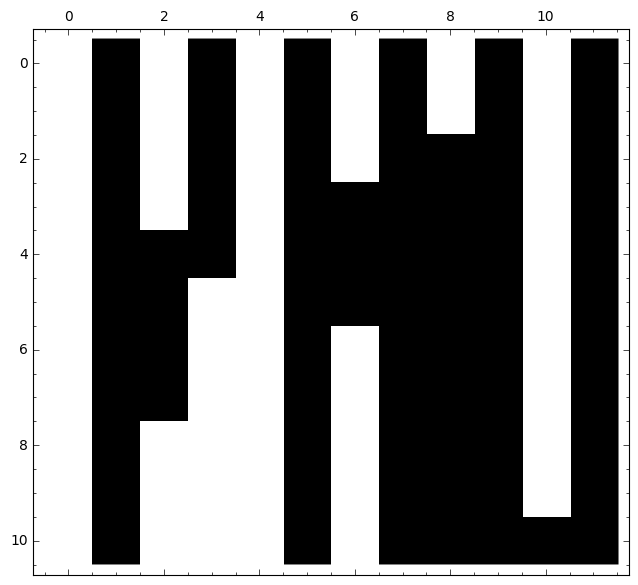

In [49]:
L_test_evol = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
L_test_evol = evolucion(L_test_evol, 100, 10)
M_test = matrix(L_test_evol)
matrix_plot(M_test)

In [50]:
def crear_lista_prueba():
    L = []
    for i in xsrange(128):
        L.append(0)
    L.append(1)
    for i in xsrange(128):
        L.append(0)
    return L

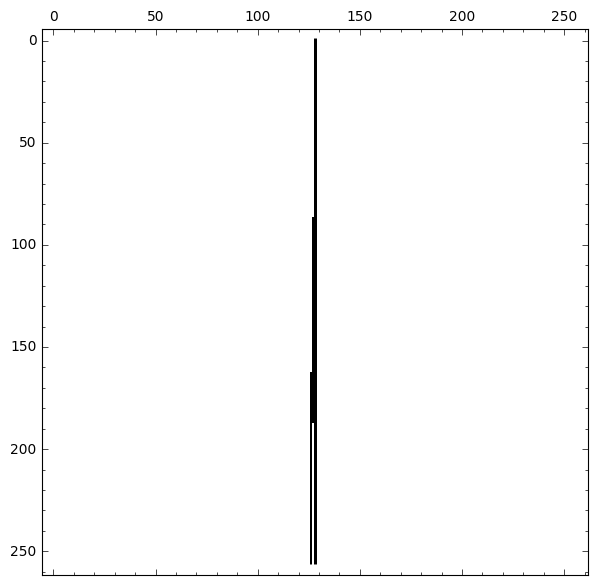

In [54]:
L18 = crear_lista_prueba()
M18 = matrix(evolucion(L18, 18, 256))
matrix_plot(M18)

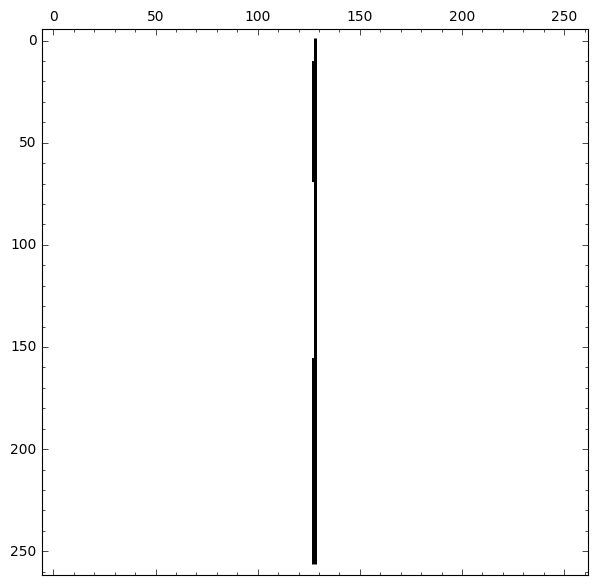

In [58]:
L30 = crear_lista_prueba()
M30 = matrix(evolucion(L30, 30, 256))
matrix_plot(M30)

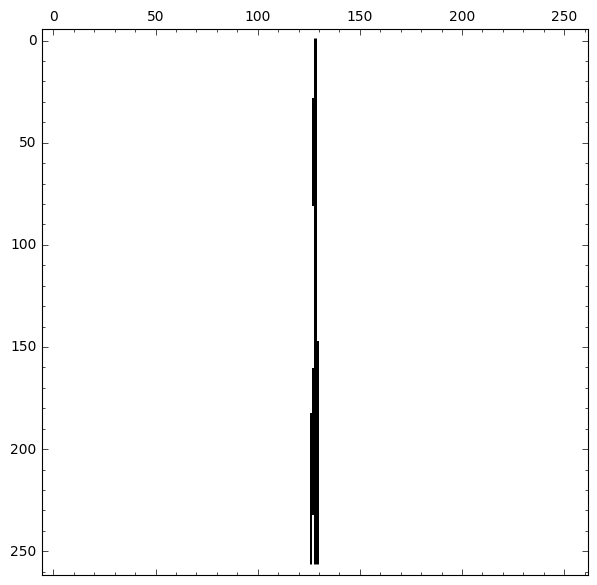

In [59]:
L50 = crear_lista_prueba()
M50 = matrix(evolucion(L50, 50, 256))
matrix_plot(M50)

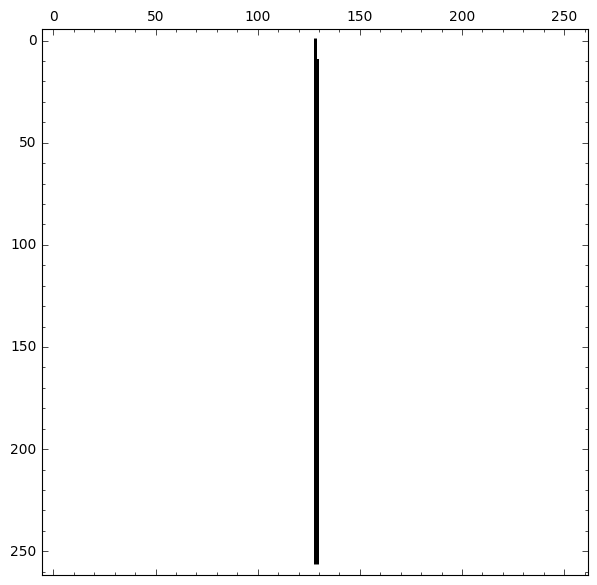

In [63]:
L110 = crear_lista_prueba()
M110 = matrix(evolucion(L110, 110, 256))
matrix_plot(M110)

Desconozco si hay algún error, porque la pinta que tienen estas matrices no parece muy interesante. Quizá provenga (si lo hay) de que $i$ en la función $siguiente$ se escoge de forma aleatoria entre cualquier índice de la lista y, como nuestra lista inicial está repleta de ceros, va a tocar repetidas veces un elemento que, junto con sus vecinos, forman la 3-tupla $(0,0,0)$ y en los números planteados en el enunciado $18, 30, 50, 110$ todos tienen una representación binaria cuyo bit más significativo es el $0$, que es el valor de la clave $(0,0,0)$ en el diccionario. Todo esto se puede solucionar cambiando la forma de escoger $i$ (forma que no se especificaba en el enunciado y se ha adoptado la que me parecía más lógica), o cambiando la lista inicial y ponerle unos cuantos unos más.

In [65]:
print 18.digits(2, padto=8)
print 30.digits(2, padto=8)
print 50.digits(2, padto=8)
print 110.digits(2, padto=8)

[0, 1, 0, 0, 1, 0, 0, 0]
[0, 1, 1, 1, 1, 0, 0, 0]
[0, 1, 0, 0, 1, 1, 0, 0]
[0, 1, 1, 1, 0, 1, 1, 0]


In [78]:
237.digits(2,padto=8)

[1, 0, 1, 1, 0, 1, 1, 1]

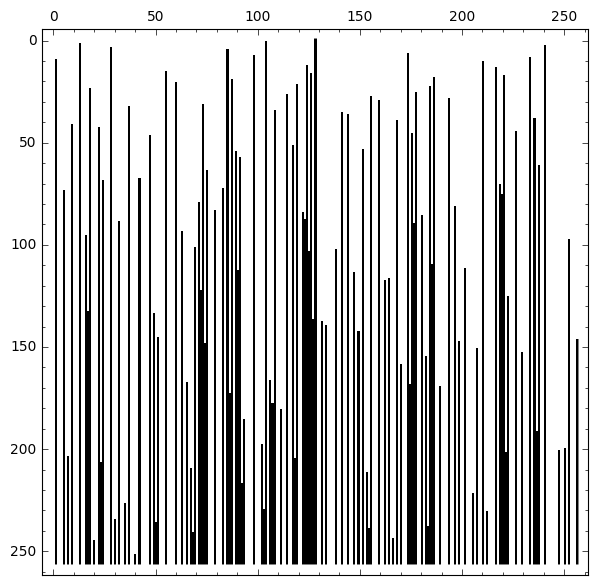

In [79]:
L237 = crear_lista_prueba()
M237 = matrix(evolucion(L237, 237, 256))
matrix_plot(M237)

Escogiendo un $k$ cuya escritura en binario (8bits) tiene de bit más siginificativo un $1$, podemos ver que la evolución cambia por completo.

<b>Percolación</b>

In [81]:
def nodos_vecinos(punto):
    L = []
    L.append((punto[0]+1, punto[1]))
    L.append((punto[0], punto[1]+1))
    L.append((punto[0]-1, punto[1]))
    L.append((punto[0], punto[1]-1))
    return L

In [88]:
def siguiente_perc(visitados, alcanzados, p):
    alcanzados2 = []
    for item in alcanzados:
        vecinos = nodos_vecinos(item)
        for vec in vecinos:
            a = random()
            if (a<=p) and (vec not in visitados):
                visitados.append(vec)
                alcanzados2.append(vec)
    return visitados, alcanzados2

In [89]:
test_sig_per = siguiente_perc([(0,0)], [(0,0)], 0.5)
print test_sig_per[0]
print test_sig_per[1]

[(0, 0), (0, 1), (0, -1)]
[(0, 1), (0, -1)]


In [90]:
def evolucion_perc(punto_inicial, p, N):
    visitados = [punto_inicial]
    alcanzados = [punto_inicial]
    for j in xsrange(N):
        visitados, alcanzados = siguiente_perc(visitados, alcanzados, p)
    return visitados

In [96]:
def build_matriz_percolacion(visitados, tam):
    M = matrix(ZZ,2*tam+1,2*tam+1,0)
    for item in visitados:
        if (-tam<item[0]<tam) and (-tam<item[1]<tam):
            M[item[0]+tam,item[1]+tam] = 1
    return M

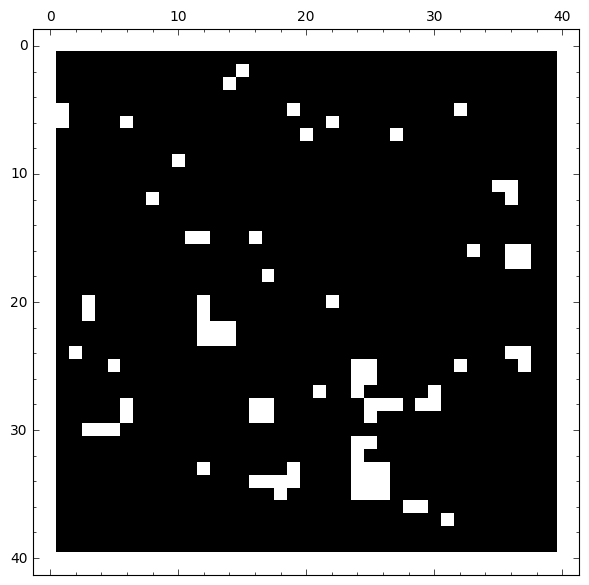

In [99]:
visit = evolucion_perc((0,0), 0.6, 100)
Mperc = build_matriz_percolacion(visit, 20)
matrix_plot(Mperc)

Con una probabilidad de $0.6$ está claro que esto diverge.

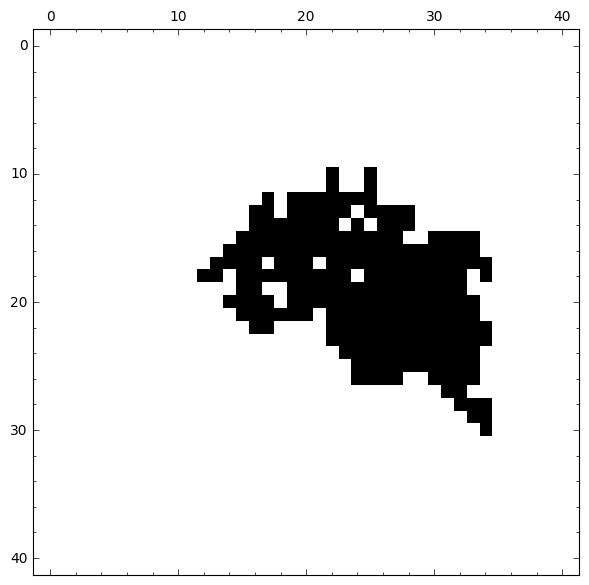

In [101]:
visit2 = evolucion_perc((0,0), 0.46, 100)
Mperc2 = build_matriz_percolacion(visit2, 20)
matrix_plot(Mperc2)

Por el contrario, con una probabilidad inferior al $0.5$ ya podemos percibir que avanza mucho más lento y que llegará un punto en el que se estanque